In [34]:
from google.colab import files


uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (2).csv


Importing and loading

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data Overview

In [46]:
file_path = 'healthcare_dataset.csv'
healthcare_data = pd.read_csv(file_path)

dataset_head = healthcare_data.head()
columns_summary = healthcare_data.info()

dataset_head, columns_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

(                  Name  Age  Gender Blood Type Medical Condition  \
 0      Tiffany Ramirez   81  Female         O-          Diabetes   
 1          Ruben Burns   35    Male         O+            Asthma   
 2            Chad Byrd   61    Male         B-           Obesity   
 3    Antonio Frederick   49    Male         B-            Asthma   
 4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   
 
   Date of Admission          Doctor                   Hospital  \
 0        2022-11-17  Patrick Parker           Wallace-Hamilton   
 1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
 2        2019-01-09      Paul Baker                 Walton LLC   
 3        2020-05-02  Brian Chandler                 Garcia Ltd   
 4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   
 
   Insurance Provider  Billing Amount  Room Number Admission Type  \
 0           Medicare    37490.983364          146       Elective   
 1   UnitedHealthcare    47304.064845     

Visualization

In [47]:
basic_stats = healthcare_data.describe(include='all')
missing_values = healthcare_data.isnull().sum()

basic_stats, missing_values

(                   Name           Age  Gender Blood Type Medical Condition  \
 count             10000  10000.000000   10000      10000             10000   
 unique             9378           NaN       2          8                 6   
 top     Michael Johnson           NaN  Female        AB-            Asthma   
 freq                  7           NaN    5075       1275              1708   
 mean                NaN     51.452200     NaN        NaN               NaN   
 std                 NaN     19.588974     NaN        NaN               NaN   
 min                 NaN     18.000000     NaN        NaN               NaN   
 25%                 NaN     35.000000     NaN        NaN               NaN   
 50%                 NaN     52.000000     NaN        NaN               NaN   
 75%                 NaN     68.000000     NaN        NaN               NaN   
 max                 NaN     85.000000     NaN        NaN               NaN   
 
        Date of Admission           Doctor   Hospi

In [48]:
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])

healthcare_data['Length of Stay'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days

healthcare_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24


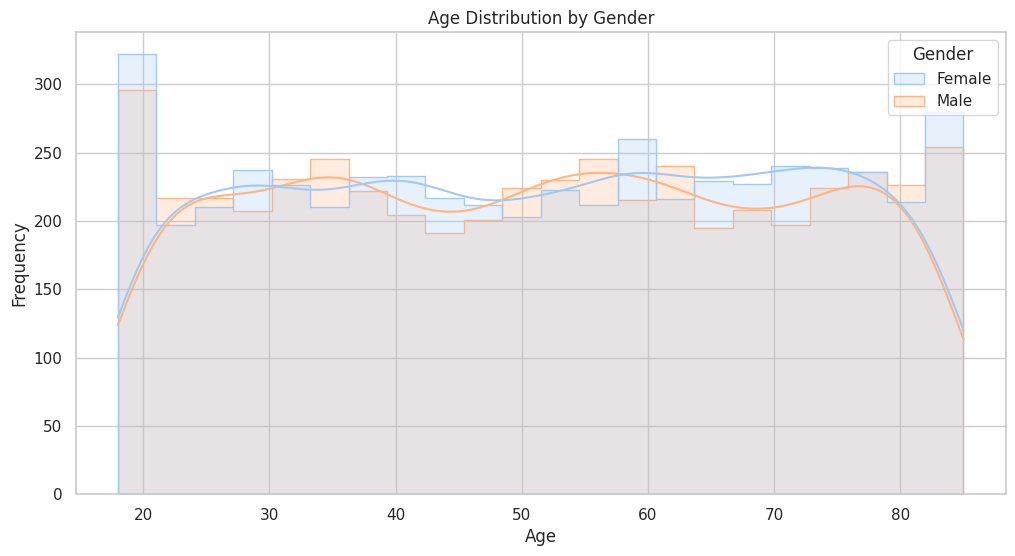

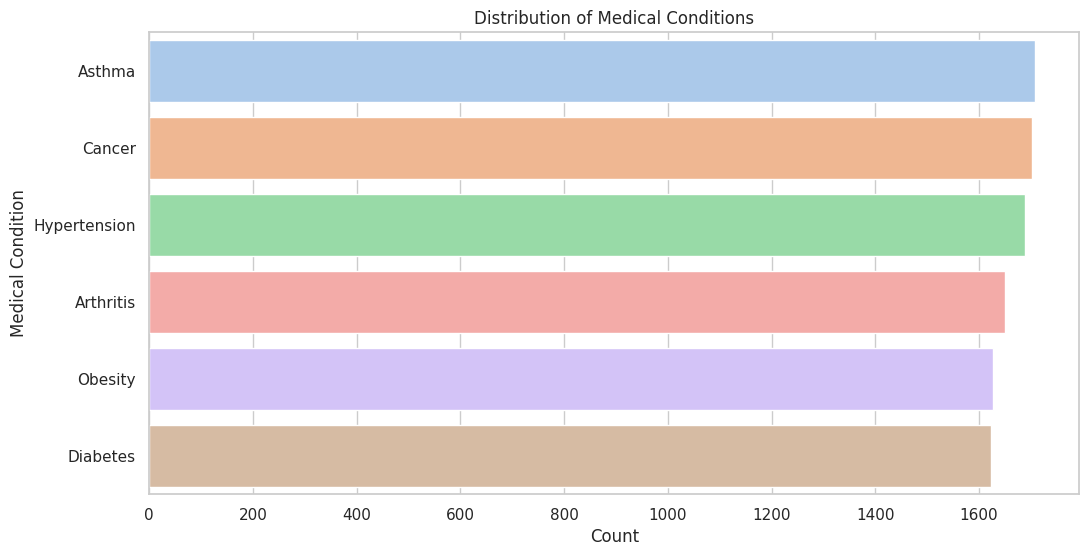

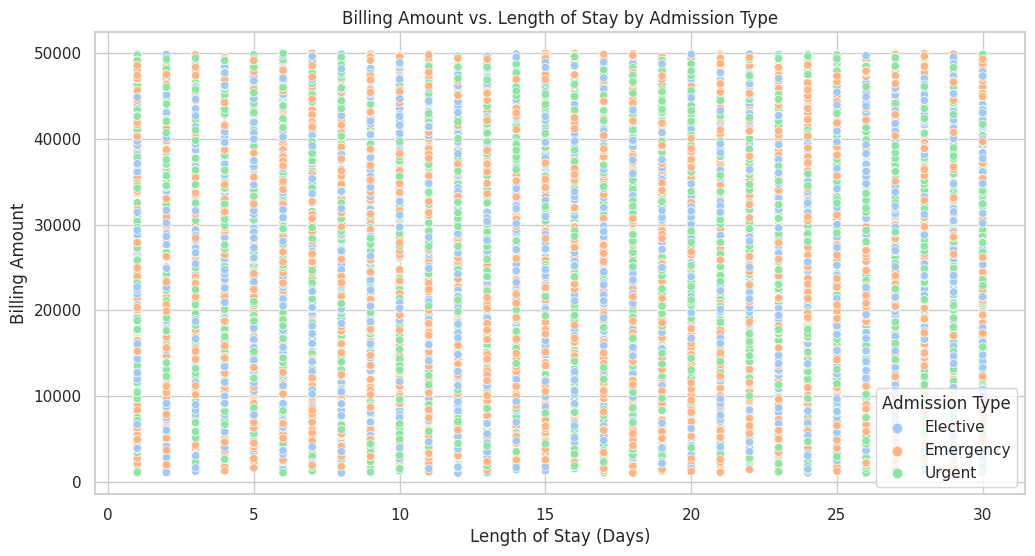

In [49]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=healthcare_data, x='Age', hue='Gender', kde=True, element="step", palette="pastel")
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=healthcare_data, y='Medical Condition', order = healthcare_data['Medical Condition'].value_counts().index, palette="pastel")
plt.title('Distribution of Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=healthcare_data, x='Length of Stay', y='Billing Amount', hue='Admission Type', palette="pastel")
plt.title('Billing Amount vs. Length of Stay by Admission Type')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Billing Amount')
plt.show()

Predictive Modeling

In [50]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

linear_model = LinearRegression()
linear_mae, linear_rmse = train_and_evaluate_model(linear_model, X_train_transformed, y_train, X_test_transformed, y_test)

random_forest_model = RandomForestRegressor(random_state=42)
rf_mae, rf_rmse = train_and_evaluate_model(random_forest_model, X_train_transformed, y_train, X_test_transformed, y_test)

gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gb_mae, gb_rmse = train_and_evaluate_model(gradient_boosting_model, X_train_transformed, y_train, X_test_transformed, y_test)

linear_mae, linear_rmse, rf_mae, rf_rmse, gb_mae, gb_rmse

(2.994937631228822e-15,
 4.068497065779019e-15,
 0.0,
 0.0,
 0.00023039464800024488,
 0.0002965165448039836)

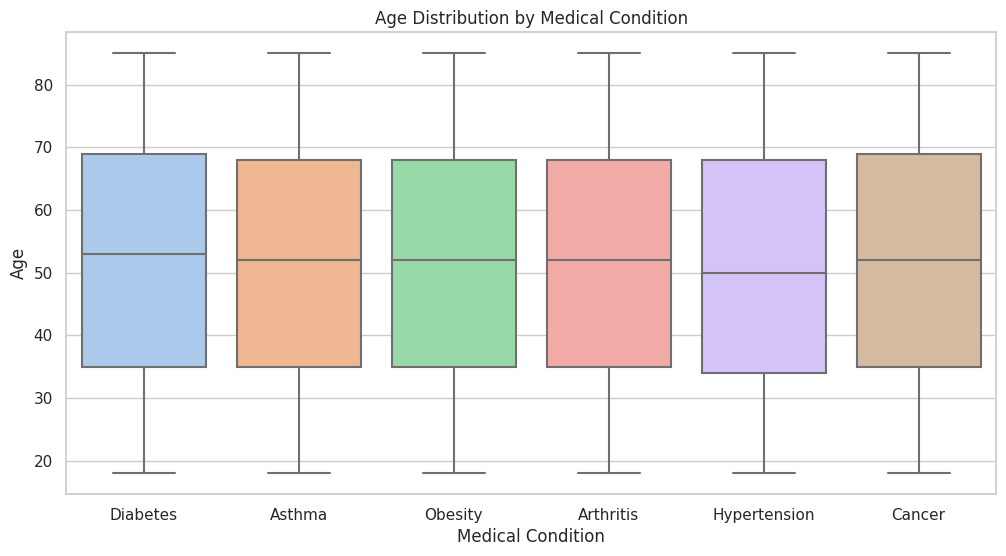

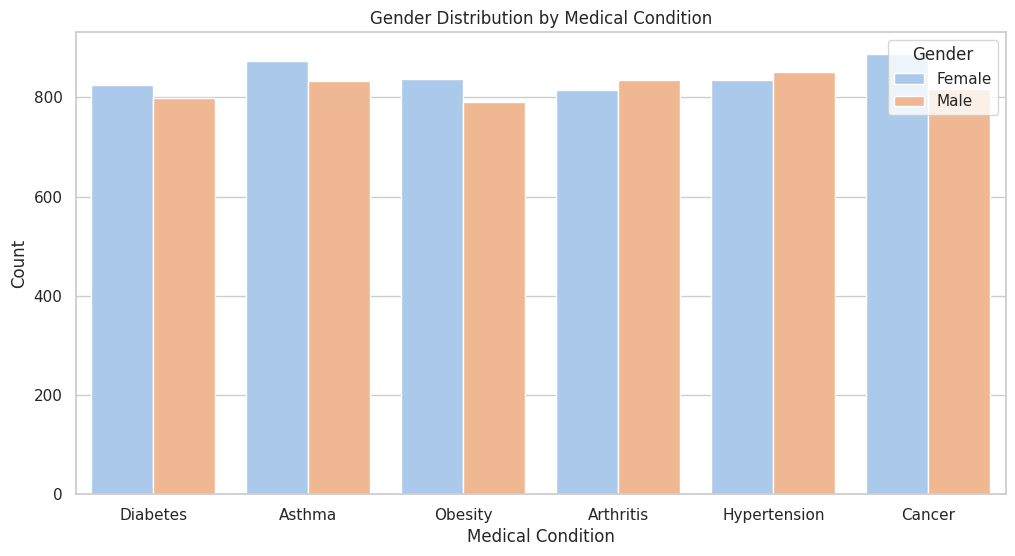

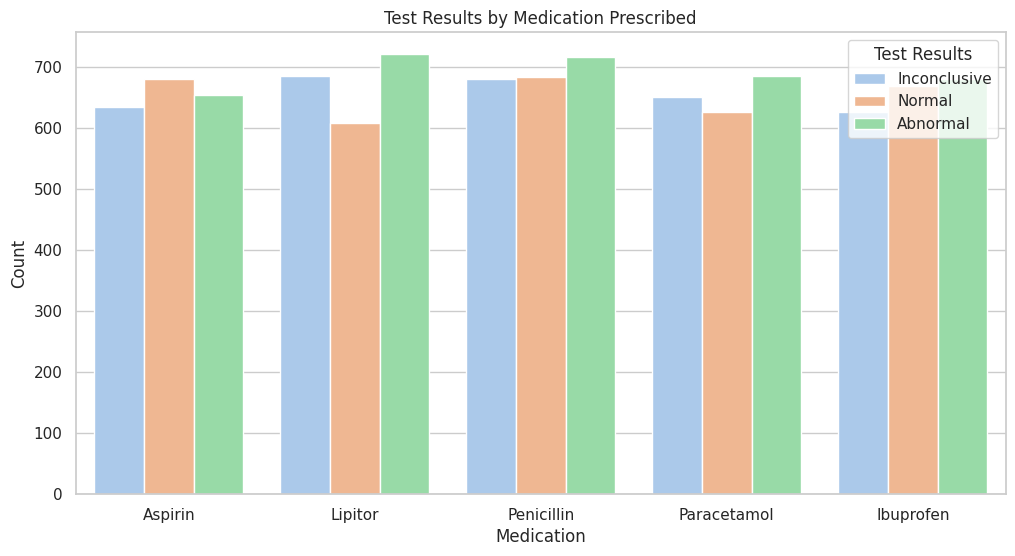

In [51]:
file_path = 'healthcare_dataset.csv'
healthcare_data = pd.read_csv(file_path)

healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])
healthcare_data['Length of Stay'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days

plt.figure(figsize=(12, 6))
sns.boxplot(data=healthcare_data, x='Medical Condition', y='Age', palette="pastel")
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=healthcare_data, x='Medical Condition', hue='Gender', palette="pastel")
plt.title('Gender Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=healthcare_data, x='Medication', hue='Test Results', palette="pastel")
plt.title('Test Results by Medication Prescribed')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.show()

Feature Selection

In [53]:
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

mae_linear, rmse_linear, r2_linear

(7.518381996824689, 8.660093535369835, -0.0049614917493074895)

Model Interpretation

In [52]:
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Billing Amount', 'Length of Stay']
predictors = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Billing Amount']
target = 'Length of Stay'

X = healthcare_data[predictors]
y = healthcare_data[target]

categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(7.652165, 8.911802441145111, -0.0642296539243945)